Target variable: Price

In [1]:
#Install the packages from the requirement.txt file:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.3/793.3 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 5.6 MB/

In [15]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.inspection import plot_partial_dependence

import os
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
#Read data
path='cleaned_all_phones.csv'
phone_info = pd.read_csv(path,
                       index_col=False,
                       sep=',', encoding='utf-8')

In [4]:
## get to know the data
print('Shape of data: ',phone_info.shape,'\n')
print('Head of data: \n',phone_info.head(10),'\n')
print('Descriptive statistics of data: \n')
print('Numerical columns: \n',phone_info.describe(include=np.number),'\n')
print('Categorical columns: \n',phone_info.describe(include=object),'\n')

Shape of data:  (1512, 22) 

Head of data: 
          phone_name   brand           os  inches resolution  battery  \
0      Y6II Compact  Huawei  Android 5.1     5.0   720x1280     2200   
1          K20 plus      LG  Android 7.0     5.3   720x1280     2700   
2    P8 Lite (2017)  Huawei  Android 7.0     5.2  1080x1920     3000   
3      Redmi Note 4  Xiaomi  Android 6.0     5.5  1080x1920     4100   
4               P10  Huawei  Android 7.0     5.1  1080x1920     3200   
5        Xperia XA1    Sony  Android 7.0     5.0   720x1280     2300   
6          P10 Lite  Huawei  Android 7.0     5.2  1080x1920     3000   
7          P10 Plus  Huawei  Android 7.0     5.5  1440x2560     3750   
8  Xperia XA1 Ultra    Sony  Android 7.0     6.0  1080x1920     2700   
9          X power2      LG  Android 7.0     5.5   720x1280     4500   

  battery_type  ram(GB) announcement_date  weight(g)  ...  video_1080p  \
0        Li-Po        2        2016-09-01      140.0  ...        False   
1       Li-Ion

In [5]:
#Get the number of duplicated rows and remove any duplicates after that:
print('Number of duplicated samples: ',phone_info[phone_info.duplicated()].shape[0])
trav_ins=phone_info.drop_duplicates(keep='first')

Number of duplicated samples:  0


In [6]:
print('Overview missing values per feature: \n',phone_info.isna().sum())

Overview missing values per feature: 
 phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64


In [7]:
phone_info['video_720p']=phone_info['video_720p'].map({'FALSE':0,'TRUE':1})
phone_info['video_1080p']=phone_info['video_1080p'].map({'FALSE':0,'TRUE':1})
phone_info['video_4K']=phone_info['video_4K'].map({'FALSE':0,'TRUE':1})
phone_info['video_8K']=phone_info['video_8K'].map({'FALSE':0,'TRUE':1})
phone_info['video_30fps']=phone_info['video_30fps'].map({'FALSE':0,'TRUE':1})
phone_info['video_60fps']=phone_info['video_60fps'].map({'FALSE':0,'TRUE':1})
phone_info['video_120fps']=phone_info['video_120fps'].map({'FALSE':0,'TRUE':1})
phone_info['video_240fps']=phone_info['video_240fps'].map({'FALSE':0,'TRUE':1})
phone_info['video_480fps']=phone_info['video_480fps'].map({'FALSE':0,'TRUE':1})
phone_info['video_960fps']=phone_info['video_960fps'].map({'FALSE':0,'TRUE':1})

In [8]:
def group_categorical_levels(grouping_criteria,data):
    categorical_columns=data.select_dtypes(include=object).columns

    for cat_col in categorical_columns:
        category_counts=data[cat_col].value_counts()
        print('Categorical column: ',cat_col)
        print('Category counts before grouping: \n',category_counts,'\n')
        data[cat_col]=np.where(data[cat_col].isin(category_counts[category_counts.lt(grouping_criteria)].index),'Other',data[cat_col])
        if len(data[cat_col].value_counts().keys())!=len(category_counts.keys()):
            print('Category counts after grouping: \n',data[cat_col].value_counts(),'\n\n')
    return data

In [17]:
phone_info=group_categorical_levels(grouping_criteria=2000,
                         data=phone_info.copy())
phone_info=pd.get_dummies(data=phone_info,
                        prefix_sep='_',columns=phone_info.select_dtypes(include=object).columns)

In [20]:
# Split the data into features (X) and target variable (y)
X = phone_info.drop(columns=['price(USD)'])  # Features
y = phone_info['price(USD)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model as benchmark
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)

# Calculate metrics for linear regression model
linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_rmse = np.sqrt(linear_reg_mse)

print("Linear Regression Metrics:")
print("MAE:", linear_reg_mae)
print("MSE:", linear_reg_mse)
print("RMSE:", linear_reg_rmse)

# Train a neural network model
nn_model = Sequential()
# Define your neural network architecture, e.g.,:
nn_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer

# Compile the model
nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
nn_model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)

# Predict using the trained neural network model
nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Calculate metrics for neural network model
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_rmse = np.sqrt(nn_mse)

print("\nNeural Network Metrics:")
print("MAE:", nn_mae)
print("MSE:", nn_mse)
print("RMSE:", nn_rmse)

# Compare with linear regression benchmark
if nn_rmse < linear_reg_rmse:
    print("\nThe neural network model outperforms the linear regression benchmark.")
else:
    print("\nThe linear regression benchmark outperforms the neural network model.")

Linear Regression Metrics:
MAE: 162.44026512871292
MSE: 66610.77580276293
RMSE: 258.0906348606298
Epoch 1/200
38/38 [==============================] - 1s 5ms/step - loss: 184781.0000
Epoch 2/200
38/38 [==============================] - 0s 4ms/step - loss: 177896.1875
Epoch 3/200
38/38 [==============================] - 0s 4ms/step - loss: 156729.7344
Epoch 4/200
38/38 [==============================] - 0s 4ms/step - loss: 120200.6406
Epoch 5/200
38/38 [==============================] - 0s 4ms/step - loss: 83336.9531
Epoch 6/200
38/38 [==============================] - 0s 4ms/step - loss: 65611.4219
Epoch 7/200
38/38 [==============================] - 0s 4ms/step - loss: 62404.0977
Epoch 8/200
38/38 [==============================] - 0s 4ms/step - loss: 60877.0039
Epoch 9/200
38/38 [==============================] - 0s 4ms/step - loss: 59566.4453
Epoch 10/200
38/38 [==============================] - 0s 4ms/step - loss: 58195.5391
Epoch 11/200
38/38 [==============================] - 0s 

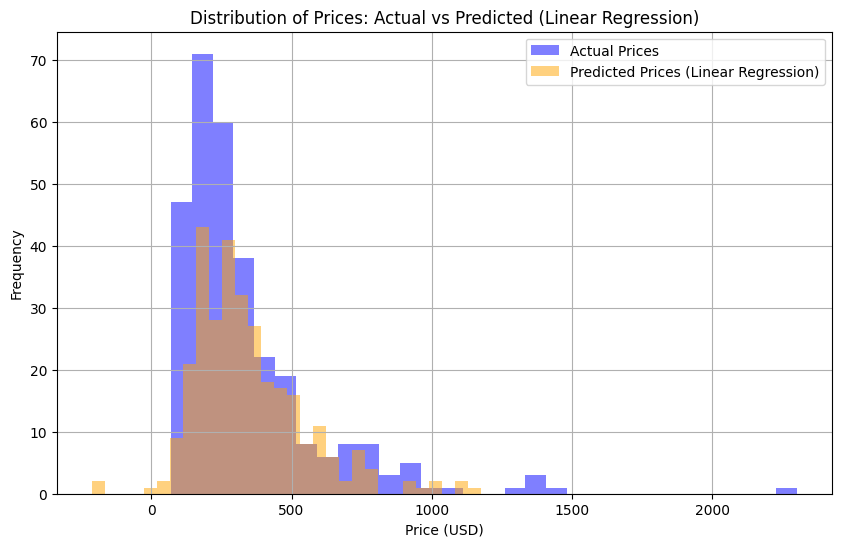

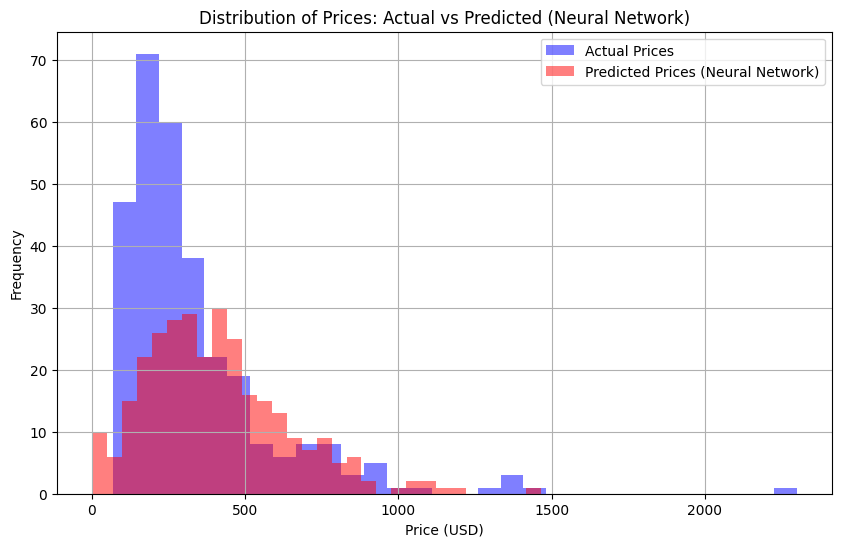

In [22]:
# Histogram comparing distribution of actual prices with predicted prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual Prices')
plt.hist(linear_reg_predictions, bins=30, alpha=0.5, color='orange', label='Predicted Prices (Linear Regression)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices: Actual vs Predicted (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Histogram comparing distribution of actual prices with predicted prices for Neural Network
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, color='blue', label='Actual Prices')
plt.hist(nn_predictions, bins=30, alpha=0.5, color='red', label='Predicted Prices (Neural Network)')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices: Actual vs Predicted (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()